### Tools needed

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### SEIR Model

In [2]:
def seir(y, t, beta, sigma, gamma):
    S, E, I, R = y
    N = S + E + I + R

    # SEIR (Human) equations
    dS_dt = -beta * S * I / N
    dE_dt = (beta * S * I / N) - (sigma * E)
    dI_dt = (sigma * E) - (gamma * I)
    dR_dt = gamma * I

    return [dS_dt, dE_dt, dI_dt, dR_dt]

### Adding Data and Parameter

In [3]:
# Example Data and Parameters
N = 1000000  # Total population
I0 = 10      # Initial infected cases
E0 = 50      # Initial exposed cases
R0 = 0       # Initial recovered cases
S0 = N - I0 - E0 - R0 # Initial susceptible population

# Starting point of the SEIR forecast
y0 = [S0, E0, I0, R0]

# SEIR model parameters
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/10    # Recovery rate (1/infectious period, e.g., 10 days)
beta = 0.5      # Base transmission rate

### Simulation

In [4]:
# Time array for a 100-day simulation
timeframe = np.arange(0, 100)

# Solving the Ordinary Differential Equation
solution = odeint(seir, y0, timeframe, args=(beta, sigma, gamma))

S, E, I, R = solution.T # Transpose the solution to get S, E, I, R as separate arrays

### SEIR Forecast Visualization

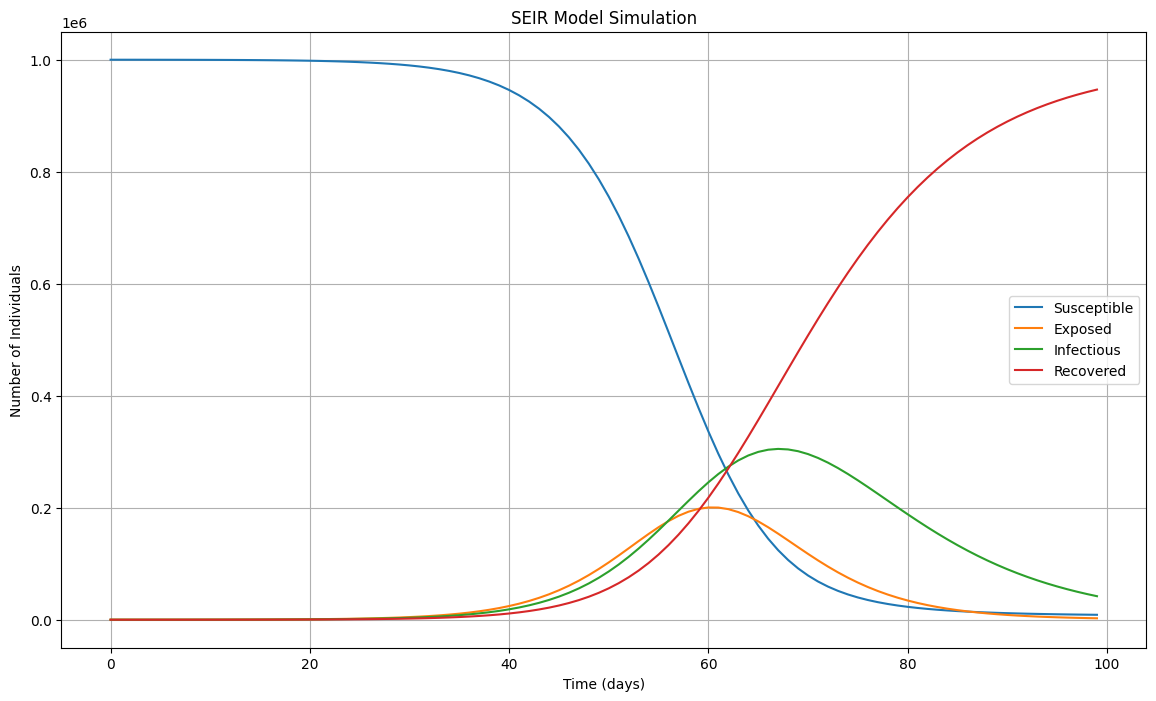

In [5]:
# --- Plot the Results ---
plt.figure(figsize=(14, 8))
plt.plot(timeframe, S, label='Susceptible')
plt.plot(timeframe, E, label='Exposed')
plt.plot(timeframe, I, label='Infectious')
plt.plot(timeframe, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title('SEIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()